**Import Libraries**

In [40]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import json
from PIL import Image
from colormap import rgb2hex, hex2rgb
import random

# Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

**Loading Data**

The downloaded data contains 8 folders with 9 images and their masks. Instead of analyzing 72 images and their masks located in differend subfolders, we will select one subfolder containing 9 images and their masks.
This is just to reduce computing time.

In [41]:
def get_data(folder, file):
    # download json
    f = open(folder + "/" + file,)
    data = json.load(f)
    f.close()
    cl = {}
    
    # Create a dictionary with classes
    for i, c in enumerate(data['classes']):
        cl[i] = dict(c)
    
    for k, v in cl.items():
        print('Class', k)
        for k2, v2 in v.items():
            print("  ", k2, v2)
    data = []
    
    # download images
    sd = [item for item in os.listdir(folder) if os.path.isdir(folder + '/' +item)] # a list of subdirectories
    print("Subdirectories: ", sd)
    
    for f in sd[1:9]: #choose one of the subdirectories to download
        print("Downloading: ", f)
        images = glob(folder + "/" + f + "/images" + "/*.jpg") # create a list of image files
        for im in images:
            mask_f = im.replace("images", "masks").replace("jpg", "png") # create a list of mask files
            image = Image.open(im)
            mask = Image.open(mask_f)
            # Debugging print statements
            image_array = np.array(image)
            mask_array = np.array(mask)
            print(f"Processing image: {im}")
            print(f"Mask shape: {mask_array.shape}, and Image shape: {image_array.shape}")
            print(f"Mask array dimensions: {len(mask_array.shape)}, and Image array dim: {len(image_array.shape)}")
            
            if len(mask_array.shape) >= 2:
                print("Appending image and mask to data list.")
                data.append([image, mask])
            else:
                print("Mask is not colored (does not have more than 2 dimensions). Skipping.")
        fig = plt.figure(figsize= (10, 10)) # display last image + mask
        plt.subplot(1,2,1)
        plt.imshow(image)
        plt.subplot(1,2,2)
        plt.imshow(mask)
        plt.show()

    #Shuffle the data
    random.shuffle(data)
    
    return (data)
        

Class 0
   title Water
   shape polygon
   color #50E3C2
   geometry_config {}
Class 1
   title Land (unpaved area)
   shape polygon
   color #F5A623
   geometry_config {}
Class 2
   title Road
   shape polygon
   color #DE597F
   geometry_config {}
Class 3
   title Building
   shape polygon
   color #D0021B
   geometry_config {}
Class 4
   title Vegetation
   shape polygon
   color #417505
   geometry_config {}
Class 5
   title Unlabeled
   shape polygon
   color #9B9B9B
   geometry_config {}
Subdirectories:  ['Tile 1', 'Tile 2', 'Tile 3', 'Tile 4', 'Tile 5', 'Tile 6', 'Tile 7', 'Tile 8']
Downloading:  Tile 2
Processing image: data/Tile 2/images\image_part_001.jpg
Mask shape: (544, 509), and Image shape: (544, 509, 3)
Mask array dimensions: 2, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 2/images\image_part_002.jpg
Mask shape: (544, 510), and Image shape: (544, 510, 3)
Mask array dimensions: 2, and Image array dim: 3
Appending image and mas

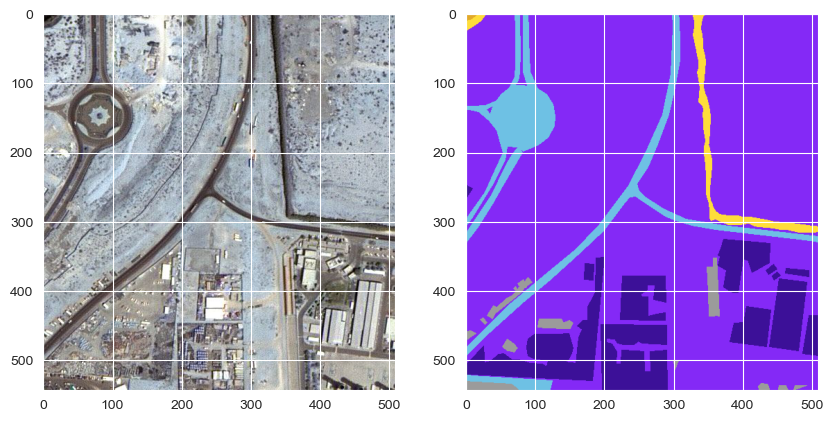

Downloading:  Tile 3
Processing image: data/Tile 3/images\image_part_001.jpg
Mask shape: (658, 682, 3), and Image shape: (658, 682, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 3/images\image_part_002.jpg
Mask shape: (658, 682, 3), and Image shape: (658, 682, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 3/images\image_part_003.jpg
Mask shape: (658, 682, 3), and Image shape: (658, 682, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 3/images\image_part_004.jpg
Mask shape: (658, 682, 3), and Image shape: (658, 682, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 3/images\image_part_005.jpg
Mask shape: (658, 682, 3), and Image shape: (658, 682, 3)
Mask array dimensions: 3, and Image array dim: 3
Appendin

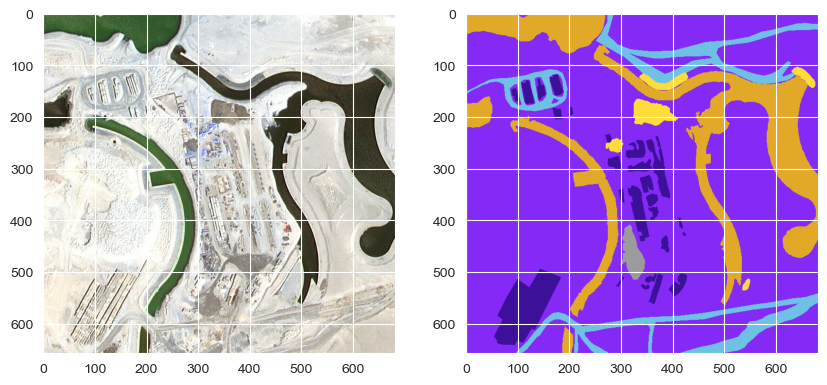

Downloading:  Tile 4
Processing image: data/Tile 4/images\image_part_001.jpg
Mask shape: (846, 1099), and Image shape: (846, 1099, 3)
Mask array dimensions: 2, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 4/images\image_part_002.jpg
Mask shape: (846, 1099), and Image shape: (846, 1099, 3)
Mask array dimensions: 2, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 4/images\image_part_003.jpg
Mask shape: (846, 1099), and Image shape: (846, 1099, 3)
Mask array dimensions: 2, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 4/images\image_part_004.jpg
Mask shape: (846, 1099), and Image shape: (846, 1099, 3)
Mask array dimensions: 2, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 4/images\image_part_005.jpg
Mask shape: (846, 1099), and Image shape: (846, 1099, 3)
Mask array dimensions: 2, and Image array dim: 3
Appending ima

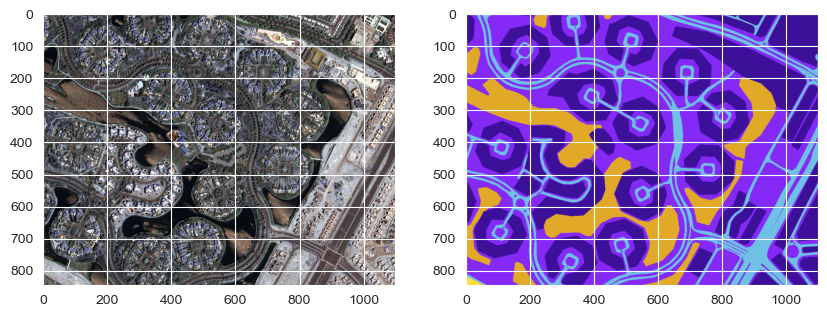

Downloading:  Tile 5
Processing image: data/Tile 5/images\image_part_001.jpg
Mask shape: (1058, 1126, 3), and Image shape: (1058, 1126, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 5/images\image_part_002.jpg
Mask shape: (1058, 1126, 3), and Image shape: (1058, 1126, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 5/images\image_part_003.jpg
Mask shape: (1058, 1126, 3), and Image shape: (1058, 1126, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 5/images\image_part_004.jpg
Mask shape: (1058, 1126, 3), and Image shape: (1058, 1126, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 5/images\image_part_005.jpg
Mask shape: (1058, 1126, 3), and Image shape: (1058, 1126, 3)
Mask array dimensions: 3, and Image a

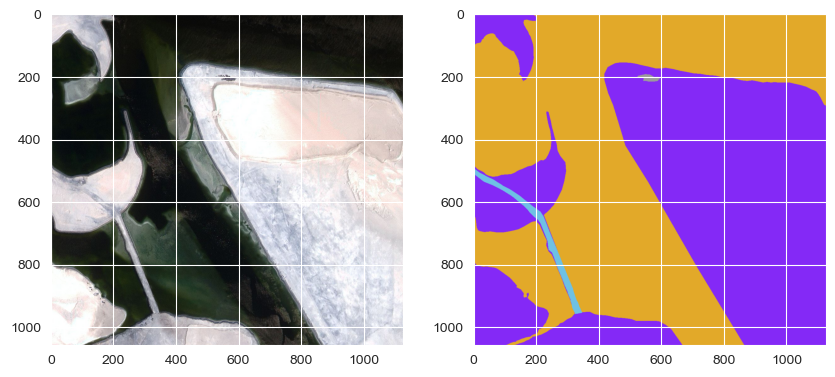

Downloading:  Tile 6
Processing image: data/Tile 6/images\image_part_001.jpg
Mask shape: (838, 859, 3), and Image shape: (838, 859, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 6/images\image_part_002.jpg
Mask shape: (838, 859, 3), and Image shape: (838, 859, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 6/images\image_part_003.jpg
Mask shape: (838, 859, 3), and Image shape: (838, 859, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 6/images\image_part_004.jpg
Mask shape: (838, 859, 3), and Image shape: (838, 859, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 6/images\image_part_005.jpg
Mask shape: (838, 859, 3), and Image shape: (838, 859, 3)
Mask array dimensions: 3, and Image array dim: 3
Appendin

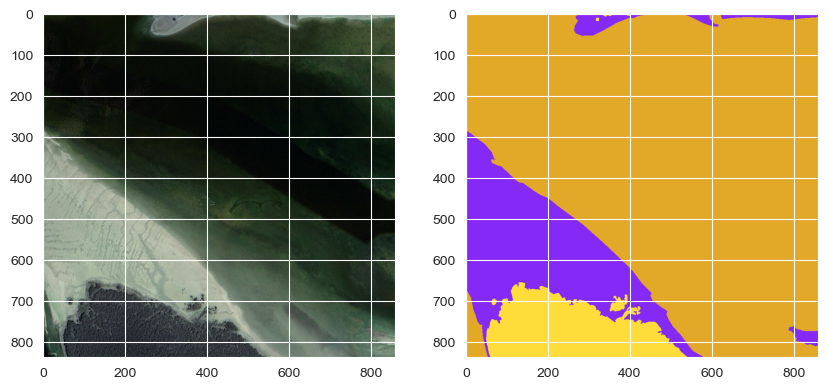

Downloading:  Tile 7
Processing image: data/Tile 7/images\image_part_001.jpg
Mask shape: (2061, 1817, 3), and Image shape: (2061, 1817, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 7/images\image_part_002.jpg
Mask shape: (2061, 1816, 3), and Image shape: (2061, 1816, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 7/images\image_part_003.jpg
Mask shape: (2061, 1817, 3), and Image shape: (2061, 1817, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 7/images\image_part_004.jpg
Mask shape: (2062, 1817, 3), and Image shape: (2062, 1817, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 7/images\image_part_005.jpg
Mask shape: (2062, 1816, 3), and Image shape: (2062, 1816, 3)
Mask array dimensions: 3, and Image a

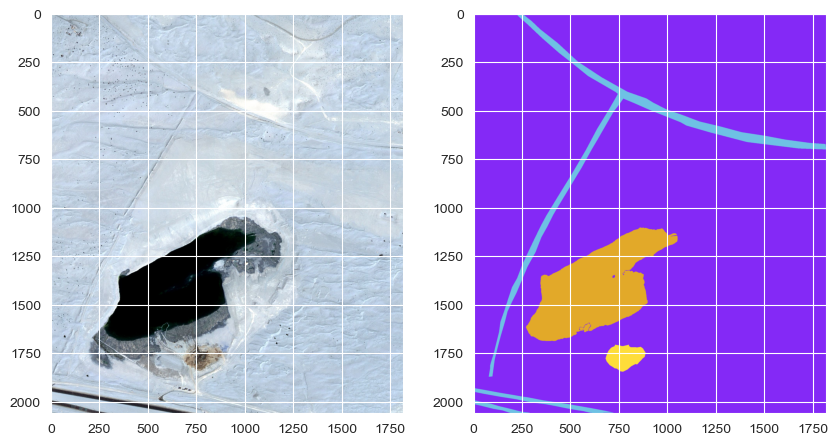

Downloading:  Tile 8
Processing image: data/Tile 8/images\image_part_001.jpg
Mask shape: (1479, 2149, 3), and Image shape: (1479, 2149, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 8/images\image_part_002.jpg
Mask shape: (1479, 2149, 3), and Image shape: (1479, 2149, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 8/images\image_part_003.jpg
Mask shape: (1479, 2149, 3), and Image shape: (1479, 2149, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 8/images\image_part_004.jpg
Mask shape: (1480, 2149, 3), and Image shape: (1480, 2149, 3)
Mask array dimensions: 3, and Image array dim: 3
Appending image and mask to data list.
Processing image: data/Tile 8/images\image_part_005.jpg
Mask shape: (1480, 2149, 3), and Image shape: (1480, 2149, 3)
Mask array dimensions: 3, and Image a

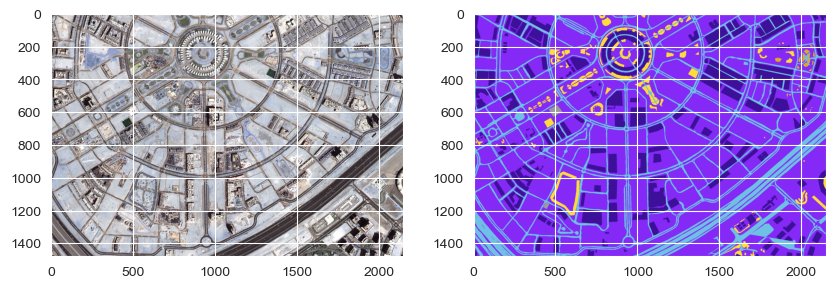

In [42]:
d = "data"
f = "classes.json"
data = get_data(d, f)

In [43]:
print(len(data))

63


**Checking the shape of mask images**

In [44]:
#mask = Image.open("data/Tile 2/masks/image_part_001.png")
#mask.show()  # Opens the mask image in the default image viewer

In [45]:
#mask_array = np.array(mask)
#print(f"Unique pixel values in mask: {np.unique(mask_array)}")


I thought they were color images, but it looks like they are Grey-scale images

**Convert Grayscale to RGB**

In [46]:
def grayscale_to_rgb(mask):
    # Normalize the grayscale values to range 0-1 for applying a colormap
    norm_mask = mask / 255.0
    # Apply a colormap; here we're using 'jet', but you can choose others
    cmap = plt.get_cmap('jet')
    rgb_mask = cmap(norm_mask)[:, :, :3]  # Take only the RGB channels (ignore alpha)
    rgb_mask = (rgb_mask * 255).astype(np.uint8)  # Scale back to 0-255 and convert to uint8
    return rgb_mask

### Create Dataset

In [47]:
def create_DataSet(data):
    DS = pd.DataFrame()
    for image, mask in data:
        # Convert mask to RGB if it's not already in RGB
        if mask.mode != "RGB":
            mask = mask.convert("RGB")
        
        # Convert image and mask to matrix
        im = np.asarray(image)
        mk = np.asarray(mask)
        
        # Transform a one-dimension array of r, g, b colors
        red = im[:, :, 0].flatten()
        green = im[:, :, 1].flatten()
        blue = im[:, :, 2].flatten()
        im_f = np.array([red, green, blue])
        
        # Transform a one-dimension array of r, g, b colors from the mask
        red_mk = mk[:, :, 0].flatten()
        green_mk = mk[:, :, 1].flatten()
        blue_mk = mk[:, :, 2].flatten()
        
        # Calculate hex classes from the mask
        h = np.array([rgb2hex(r, g, b) for r, g, b in zip(red_mk, green_mk, blue_mk)])
        mk_f = np.array([red_mk, green_mk, blue_mk, h])
        
        # Concatenate image and mask data
        d = np.concatenate((im_f, mk_f), axis=0)
        print(d.shape)
        
        # Create a DataFrame with the combined data
        DS_new = pd.DataFrame(np.transpose(d), columns = ['Im_Red', 'Im_Green', 'Im_Blue', 'Mk_Red', 'Mk_Green', 'Mk_Blue', 'HEX'])
        
        # Append the new DataFrame to the main DataSet
        if len(DS) == 0:
            DS = DS_new
        else:
            DS = DS.append(DS_new, ignore_index=True)
    
    return DS
        

**Create train and test datasets**

We'll use the first 4 images and masks for training and the last 5 for testing

In [48]:
dl = round(len(data)/2)
print(type(dl))
print("Create a training Dataset")
train = create_DataSet(data[:dl])
print(train)
print("Create a test Dataset")
test = create_DataSet(data[dl:])
print(test)

<class 'int'>
Create a training Dataset
(7, 448756)
(7, 448756)
(7, 3178371)
(7, 448756)
(7, 929754)
(7, 929754)
(7, 719842)
(7, 929754)
(7, 448756)
(7, 929754)
(7, 3180520)
(7, 3178371)
(7, 3178371)
(7, 277440)
(7, 276896)
(7, 929754)
(7, 3744592)
(7, 448756)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352452 entries, 0 to 3352451
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Im_Red    object
 1   Im_Green  object
 2   Im_Blue   object
 3   Mk_Red    object
 4   Mk_Green  object
 5   Mk_Blue   object
 6   HEX       object
dtypes: object(7)
memory usage: 179.0+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180048 entries, 0 to 3180047
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Im_Red    object
 1   Im_Green  object
 2   Im_Blue   object
 3   Mk_Red    object
 4   Mk_Green  object
 5   Mk_Blue   object
 6   HEX       object
dtypes: object(7)
memory usage: 169.8+ MB


In [ ]:
# Filter out the #000000 pixels from the test set
train = train[train['HEX'] != '#000000']
test = test[test['HEX'] != '#000000']

**Change 'Hex' column from hex format to Categorical**

In [ ]:
train.loc[:, 'HEX'] = train['HEX'].astype('category')
train['HEX']

0          #8429F6
1          #8429F6
2          #8429F6
3          #8429F6
4          #8429F6
            ...   
3352447    #8429F6
3352448    #8429F6
3352449    #8429F6
3352450    #8429F6
3352451    #8429F6
Name: HEX, Length: 3352150, dtype: category
Categories (6, object): ['#3C1098', '#6EC1E4', '#8429F6', '#9B9B9B', '#E2A929', '#FEDD3A']

In [ ]:
test.loc[:, 'HEX'] = test['HEX'].astype('category')
test['HEX']

0          #E2A929
1          #E2A929
2          #E2A929
3          #E2A929
4          #E2A929
            ...   
3180043    #8429F6
3180044    #8429F6
3180045    #8429F6
3180046    #8429F6
3180047    #8429F6
Name: HEX, Length: 3180044, dtype: category
Categories (6, object): ['#3C1098', '#6EC1E4', '#8429F6', '#9B9B9B', '#E2A929', '#FEDD3A']

**Change types of int columns**

In [ ]:
cl = ['Im_Red', 'Im_Green', 'Im_Blue', 'Mk_Red', 'Mk_Green', 'Mk_Blue']
train[cl] = train[cl].astype('int64')
test[cl] = test[cl].astype('int64')
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3352150 entries, 0 to 3352451
Data columns (total 7 columns):
 #   Column    Dtype   
---  ------    -----   
 0   Im_Red    int64   
 1   Im_Green  int64   
 2   Im_Blue   int64   
 3   Mk_Red    int64   
 4   Mk_Green  int64   
 5   Mk_Blue   int64   
 6   HEX       category
dtypes: category(1), int64(6)
memory usage: 182.2 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180044 entries, 0 to 3180047
Data columns (total 7 columns):
 #   Column    Dtype   
---  ------    -----   
 0   Im_Red    int64   
 1   Im_Green  int64   
 2   Im_Blue   int64   
 3   Mk_Red    int64   
 4   Mk_Green  int64   
 5   Mk_Blue   int64   
 6   HEX       category
dtypes: category(1), int64(6)
memory usage: 172.9 MB
None


**Visualize our data with seaborn**

<Axes: xlabel='HEX', ylabel='count'>

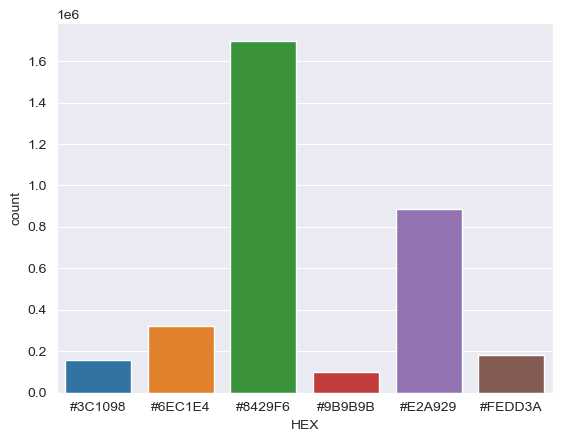

In [ ]:
c = pd.DataFrame(train['HEX'])
sns.set_style('darkgrid')
sns.countplot(x='HEX', data=c)

In [ ]:
c.head()

,HEX
0,#8429F6
1,#8429F6
2,#8429F6
3,#8429F6
4,#8429F6


<Axes: xlabel='HEX', ylabel='count'>

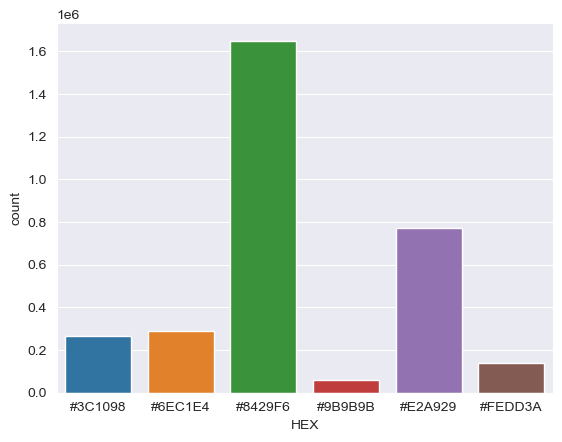

In [ ]:
c = pd.DataFrame(test['HEX'])
sns.set_style('darkgrid')
sns.countplot(x='HEX', data=c)

### Classification Model Creation

In [ ]:
clf = LogisticRegression(max_iter=100, n_jobs=-1)
c = train.columns
clf.fit(train[c[0:3]], train[c[-1:]].values.ravel())

LogisticRegression(n_jobs=-1)

Accuracy train DataSet:  74.7% Accuracy test DataSet:  73.1%


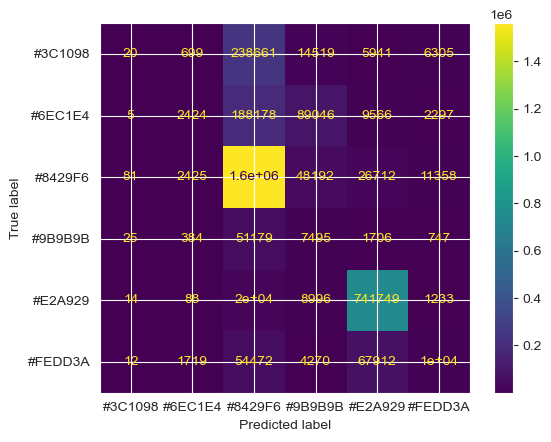

In [ ]:
scores_train = clf.score(train[c[0:3]], train[c[-1:]].values.ravel())
scores_test = clf.score(test[c[0:3]], test[c[-1:]].values.ravel())
print('Accuracy train DataSet: {: .1%}'.format(scores_train), 'Accuracy test DataSet: {: .1%}'.format(scores_test))
ConfusionMatrixDisplay.from_estimator(clf, test[c[0:3]], test[c[-1:]].values.ravel())  
plt.show()

### Create own mask of land use

In [ ]:
test_image = 8
mask_test = data[test_image:test_image+1] # Test Image + Mask
mask_test_DataSet = create_DataSet(mask_test) #Build dataset
print(mask_test_DataSet)

In [ ]:
c = mask_test_DataSet.columns
mask_test_predict = clf.predict(mask_test_DataSet[c[0:3]])
print(mask_test_predict)

In [ ]:
size = mask_test[0][1].size
print(size)
predict_img = np.array(mask_test_predict).reshape((size[1], size[0]))
print(predict_img)

In [ ]:
rgb_size = np.array(mask_test[0][0]).shape
print("Image size: ", rgb_size)
predict_img_rgb = np.zeros(rgb_size)
for i, r in enumerate(predict_img):
    for j, c in enumerate (r):
        predict_img_rgb[i, j, 0], predict_img_rgb[i, j, 1], predict_img_rgb[i, j, 2] = hex2rgb(c)

In [ ]:
predict_img_rgb = predict_img_rgb.astype('int')
print("Model mask")
plt.imshow(predict_img_rgb)
plt.show()
print("Real mask")
plt.imshow(mask_test[0][1])
plt.show()